In [3]:
#importing lib needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#importing models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout , Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from keras.utils import to_categorical
import warnings
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [4]:
#loading Data
df=pd.read_csv('Data\\Epileptic Seizure Recognition.csv')

In [5]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [6]:
df.shape

(11500, 180)

In [7]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 180 columns):
 #    Column   Non-Null Count  Dtype 
---   ------   --------------  ----- 
 0    Unnamed  11500 non-null  object
 1    X1       11500 non-null  int64 
 2    X2       11500 non-null  int64 
 3    X3       11500 non-null  int64 
 4    X4       11500 non-null  int64 
 5    X5       11500 non-null  int64 
 6    X6       11500 non-null  int64 
 7    X7       11500 non-null  int64 
 8    X8       11500 non-null  int64 
 9    X9       11500 non-null  int64 
 10   X10      11500 non-null  int64 
 11   X11      11500 non-null  int64 
 12   X12      11500 non-null  int64 
 13   X13      11500 non-null  int64 
 14   X14      11500 non-null  int64 
 15   X15      11500 non-null  int64 
 16   X16      11500 non-null  int64 
 17   X17      11500 non-null  int64 
 18   X18      11500 non-null  int64 
 19   X19      11500 non-null  int64 
 20   X20      11500 non-null  int64 
 21   X21      1

In [8]:
#checking all nulls in our data
df.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [9]:
df.drop('Unnamed',axis=1,inplace=True)

In [10]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [11]:
X = df.drop('y' , axis = 1)
X.shape

(11500, 178)

In [12]:
y = df['y']
y[y > 1] =0
y.shape

(11500,)

<AxesSubplot:xlabel='y', ylabel='count'>

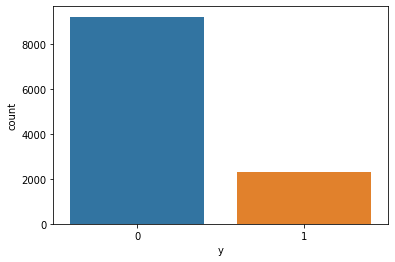

In [13]:
sns.countplot(x = 'y',
              data = df)

# Under Sampling

In [44]:
from imblearn.under_sampling import NearMiss
ns = NearMiss()
X_usp ,Y_usp = ns.fit_resample(X,y)

In [45]:
Y_usp.value_counts().sort_index()

0    2300
1    2300
Name: y, dtype: int64

In [46]:
X_usp.shape ,  Y_usp.shape

((4600, 178), (4600,))

In [54]:
Y_usp = pd.get_dummies(Y_usp)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   
X_usp=scaler.fit_transform(X_usp)    

In [56]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(X_usp,Y_usp,test_size=0.2,shuffle=True)  

In [57]:
print(' X_train.shape : ',X_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' X_test.shape : ',X_test.shape)
print(' y_test.shape : ',y_test.shape)

 X_train.shape :  (3680, 178)
 y_train.shape :  (3680, 2)
 X_test.shape :  (920, 178)
 y_test.shape :  (920, 2)


In [36]:
model = Sequential()

model.add(Dense(2048 , input_shape = (178,) , activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 2048)              366592    
                                                                 
 dense_21 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_22 (Dense)            (None, 512)               524800    
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 dense_24 (Dense)            (None, 2)                 514       
                                                                 
Total params: 3,121,410
Trainable params: 3,121,410
Non-trainable params: 0
_________________________________________________________________


In [37]:
from keras.callbacks import ModelCheckpoint , CSVLogger
filepath = "model_class.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_best_only=True, mode='max')
log_fname = 'model_log.csv'
csv_logger = CSVLogger(filename=log_fname,separator=',',append=False)
callbacks_list = [checkpoint, csv_logger] 

In [38]:
history=model.fit(X_train, y_train, epochs=50, verbose=1 ,validation_split=0.15 , callbacks = callbacks_list )

Epoch 1/50
96/98 [============================>.] - ETA: 0s - loss: 0.1870 - accuracy: 0.9141
Epoch 1: val_accuracy improved from -inf to 0.98188, saving model to model_class.h5
98/98 [==============================] - 5s 52ms/step - loss: 0.1864 - accuracy: 0.9146 - val_loss: 0.0495 - val_accuracy: 0.9819
Epoch 2/50
98/98 [==============================] - ETA: 0s - loss: 0.0389 - accuracy: 0.9879
Epoch 2: val_accuracy improved from 0.98188 to 0.99638, saving model to model_class.h5
98/98 [==============================] - 3s 32ms/step - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.0099 - val_accuracy: 0.9964
Epoch 3/50
98/98 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 0.9930
Epoch 3: val_accuracy did not improve from 0.99638
98/98 [==============================] - 3s 29ms/step - loss: 0.0205 - accuracy: 0.9930 - val_loss: 0.0255 - val_accuracy: 0.9909
Epoch 4/50
97/98 [============================>.] - ETA: 0s - loss: 0.0171 - accuracy: 0.9932
Epoch 4: val

97/98 [============================>.] - ETA: 0s - loss: 7.7524e-07 - accuracy: 1.0000
Epoch 30: val_accuracy did not improve from 0.99819
98/98 [==============================] - 4s 36ms/step - loss: 7.6952e-07 - accuracy: 1.0000 - val_loss: 0.0631 - val_accuracy: 0.9928
Epoch 31/50
97/98 [============================>.] - ETA: 0s - loss: 6.2970e-07 - accuracy: 1.0000
Epoch 31: val_accuracy did not improve from 0.99819
98/98 [==============================] - 3s 33ms/step - loss: 6.2666e-07 - accuracy: 1.0000 - val_loss: 0.0640 - val_accuracy: 0.9928
Epoch 32/50
98/98 [==============================] - ETA: 0s - loss: 5.2609e-07 - accuracy: 1.0000
Epoch 32: val_accuracy did not improve from 0.99819
98/98 [==============================] - 4s 37ms/step - loss: 5.2609e-07 - accuracy: 1.0000 - val_loss: 0.0648 - val_accuracy: 0.9928
Epoch 33/50
98/98 [==============================] - ETA: 0s - loss: 4.4325e-07 - accuracy: 1.0000
Epoch 33: val_accuracy did not improve from 0.99819
98/98 

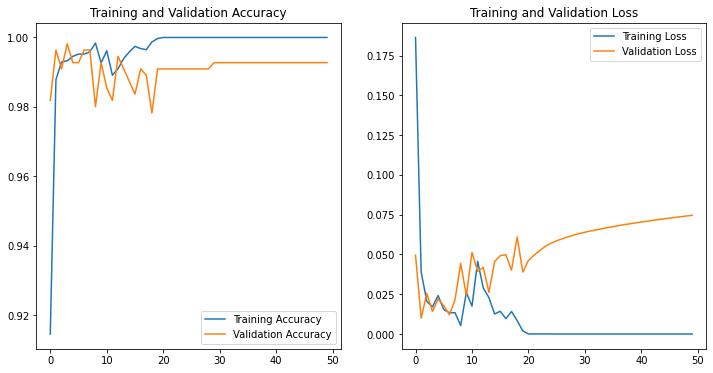

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)
y_test = np.argmax(y_test.values, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(y_test, Y_pred)
print(cm)

print('Classification Report')
print(classification_report(y_test, Y_pred))

29/29 [==============================] - 0s 5ms/step
Confusion Matrix
[[466   0]
 [  1 453]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       454

    accuracy                           1.00       920
   macro avg       1.00      1.00      1.00       920
weighted avg       1.00      1.00      1.00       920



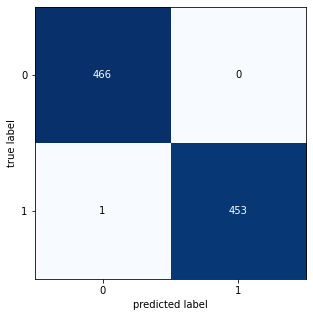

In [68]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()